<a href="https://colab.research.google.com/github/Ihssene-Brahimi/Data_Analysis_Univ/blob/main/ANAD_ANOVA_exo1_exo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANAD EXO 1**

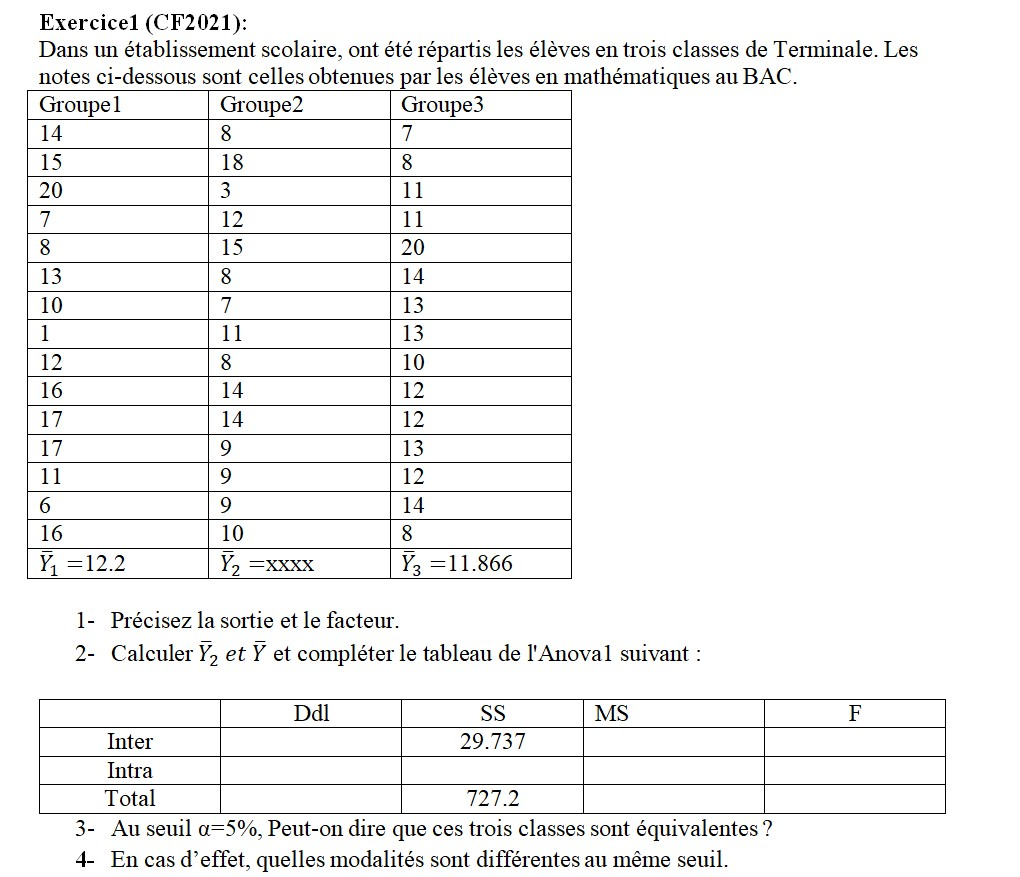

1. La sortie : La moyenne du groupe
2. Le facteur : Le groupe à 3 modalités

# **Importation des bibliothèques**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st

# **Calcule de Y2 et Y**

## 1. Creation de la table des données

In [ ]:
# creating the Numpy array
array = np.array([[14, 8, 7], [15, 18, 8], [20, 3, 11], 
                  [7, 12, 11], [8, 15, 20], [13, 8, 14], 
                  [10, 7, 13],[1, 11, 13], [12, 8, 10],
                  [16, 14, 12],[17, 14, 12], [17, 9, 13],
                  [11, 9, 12],[6, 9, 14], [16, 10, 8]])
  
# creating a list of index names
index_values = ['1', '2', '3',
                '4', '5', '6', '7']
   
# creating a list of column names
column_values = ['Group1', 'Group2', 'Group3']
  
# creating the dataframe
df = pd.DataFrame(data = array,                  
                  columns = column_values)
  
# displaying the dataframe
print(df)

    Group1  Group2  Group3
0       14       8       7
1       15      18       8
2       20       3      11
3        7      12      11
4        8      15      20
5       13       8      14
6       10       7      13
7        1      11      13
8       12       8      10
9       16      14      12
10      17      14      12
11      17       9      13
12      11       9      12
13       6       9      14
14      16      10       8


In [ ]:
df.head()

,Group1,Group2,Group3
0,14,8,7
1,15,18,8
2,20,3,11
3,7,12,11
4,8,15,20


In [ ]:
n=45 # population size
k=3 # Number of categories (groups)
total=0
for col in df.columns:
  for x in df[col]:
    total+=x
Y=total/n

In [ ]:
Y1 = df.Group1.mean()
Y2 = df.Group2.mean()
Y3 = df.Group3.mean()

Moy = pd.DataFrame({'Y':[Y],
                       'Y1':[Y1],
                       'Y2':[Y2],
                       'Y3':[Y3],
                       })
Moy.head()

,Y,Y1,Y2,Y3
0,11.466667,12.2,10.333333,11.866667


# **Table ANOVA1**

# **One-Way ANOVA**

The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. It essentially answers the question: do any of the group means differ from one another? The process is similar to the t-test: you go through several calculations to arrive at a test statistic and then you compare the test statistic to a critical value based on a probability distribution. In the case of the ANOVA, you use the "f-distribution".

The scipy library has a function for carrying out one-way ANOVA tests called scipy.stats.f_oneway().

In [ ]:
# Perform the ANOVA
st.f_oneway(df.Group1,df.Group2, df.Group3)

F_onewayResult(statistic=0.8952399158860636, pvalue=0.4161609390862492)

The test output yields an F-statistic of 0.895 and a p-value of 0.416, indicating that there is no significant difference between the means of each group.


# **SSW**

In [ ]:
def ssw(data):
    mean = sum(data) / len(data)
    ssw = 0
    for i in range(len(data)):
        ssw += (data[i]-mean)**2
    return mean, ssw

In [ ]:
ssw_1=ssw(df.Group1)
ssw_2=ssw(df.Group2)
ssw_3=ssw(df.Group3)

In [ ]:
SSW = ssw_1[1] + ssw_2[1] +ssw_3[1]
SSW

697.4666666666667

# **SSB**

In [ ]:
SSB = 15*((ssw_1[0]-Y)**2+(ssw_2[0]-Y)**2+(ssw_3[0]-Y)**2)
SSB

29.733333333333306

# **SST**

In [ ]:
SST=SSB+SSW
SST

727.2

# **Degrées de Liberté**

In [ ]:
dfB=k-1
dfW=n-k
dfT=n-1

# **Moyennes des variances**

In [ ]:
MSB=SSB/dfB
MSW=SSW/dfW
MST=SST/dfT

# **F-score**

In [ ]:
F=MSB/MSW
F

0.895239915886063

# **One-Way ANOVA Table**

In [ ]:
anova1 = pd.DataFrame({'Ddl':[dfB, dfW, dfT],
                       'SS':[SSB, SSW, SST],
                       'MS':[MSB, MSW, MST],
                       'F':[F,'',''],
                       })
indexes=['Inter(B)','Intra(W)','Total(T)']
anova1.index=indexes
anova1.head()

,Ddl,SS,MS,F
Inter(B),2,29.733333,14.866667,0.89524
Intra(W),42,697.466667,16.606349,
Total(T),44,727.200000,16.527273,


# **ANAD EXO2**

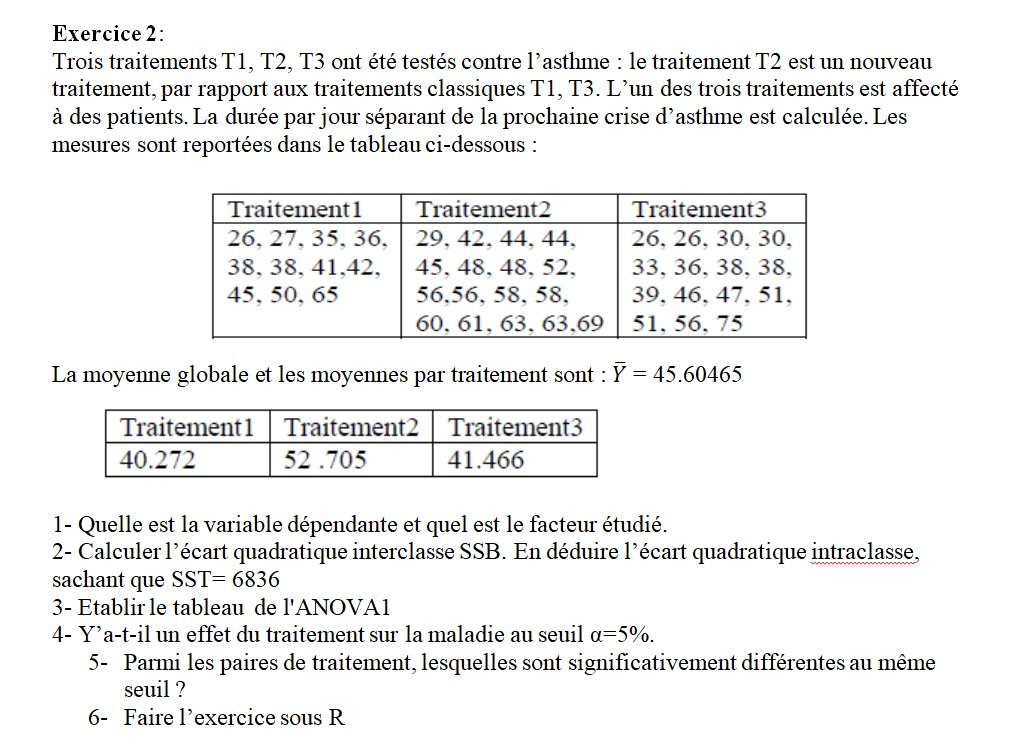

In [ ]:
# creating the dataframe
df = pd.DataFrame({'Traitement1': [26, 27, 35, 36, 38, 38, 41, 42, 45, 50, 65, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                   'Traitement2': [29, 42, 44, 44, 45, 48, 48, 52, 56, 56, 58, 58, 60, 61, 63, 63, 69],
                   'Traitement3': [26, 26, 30, 30, 33, 36, 38, 38, 39, 46, 47, 51, 51, 56, 75, np.nan, np.nan]
                   })
  
# displaying the dataframe
print(df)

    Traitement1  Traitement2  Traitement3
0          26.0           29         26.0
1          27.0           42         26.0
2          35.0           44         30.0
3          36.0           44         30.0
4          38.0           45         33.0
5          38.0           48         36.0
6          41.0           48         38.0
7          42.0           52         38.0
8          45.0           56         39.0
9          50.0           56         46.0
10         65.0           58         47.0
11          NaN           58         51.0
12          NaN           60         51.0
13          NaN           61         56.0
14          NaN           63         75.0
15          NaN           63          NaN
16          NaN           69          NaN


In [ ]:
Moy = pd.DataFrame({'Y1': [df.Traitement1.mean(skipna=True).round(3)],
                   'Y2': [df.Traitement2.mean(skipna=True).round(3)],
                   'Y3': [df.Traitement3.mean(skipna=True).round(3)]
                   })
Moy

,Y1,Y2,Y3
0,40.273,52.706,41.467


In [ ]:
Y1 = 40.272
Y2 = 52.705
Y3 = 41.466
Y = 45.60465

Variable dependante : La durée separant 2 crises d'asthme

Le facteur : Le traitement à 3 modalités

In [ ]:
n1 = 11
n2 = 17
n3 = 15
n = 43
k = 3

In [ ]:
T1=df.Traitement1.dropna(axis=0)
T3=df.Traitement3.dropna(axis=0)

# **SSW**

In [ ]:
ssw_1=ssw(T1)
ssw_2=ssw(df.Traitement2)
ssw_3=ssw(T3)

In [ ]:
SSW = (ssw_1[1] + ssw_2[1] +ssw_3[1]).round(2)
SSW

5219.44

# **SSB**

In [ ]:
SSB = (11*(ssw_1[0]-Y)**2+17*(ssw_2[0]-Y)**2+15*(ssw_3[0]-Y)**2)
SSB

1426.8345064876416

# **SSW**

In [ ]:
SST = 6836
SSW = SST - SSB 
SSW

5409.165493512359

# **Table ANOVA1**

In [ ]:
dfB=k-1
dfW=n-k
dfT=n-1

In [ ]:
MSB=SSB/dfB
MSW=SSW/dfW
MST=SST/dfT

# **F-test**

In [ ]:
F=MSB/MSW
F

5.275617868223693

## F-critical (Tabulée)

scipy.stats.f.ppf(q, dfn, dfd)

where:

q: The significance level to use
dfn: The numerator degrees of freedom
dfd: The denominator degrees of freedom

In [ ]:
st.f.ppf(q=1-.05, dfn=2, dfd=40)

3.2317269928308443

F-critical = 3.23 (F-critical calculator) F-score (5.2756) > F-critical (3.23) -> On rejette H0: Donc les moyennes sont differentes, il y a une difference significative entre les traitements. 

**Another way to calculate F-score**

In [ ]:
from scipy.stats import f_oneway

f_oneway(T1, df.Traitement2, T3)

F_onewayResult(statistic=5.46738063481212, pvalue=0.007960023084116408)

p-value, i.e. the probability that under a true null hypothesis the F-statistic is not less than 5.46 is 0.00796 or 0,796%. Since this value does not exceed the significance level α = 5%, the null hypothesis is rejected.

In [ ]:
anova1 = pd.DataFrame({'Ddl':[dfB, dfW, dfT],
                       'SS':[SSB, SSW, SST],
                       'MS':[MSB, MSW, MST],
                       'F':[F,'',''],
                       })
indexes=['Inter(B)','Intra(W)','Total(T)']
anova1.index=indexes
anova1.SS=anova1.SS.round(2)
anova1.MS=anova1.MS.round(2)
anova1.head()

,Ddl,SS,MS,F
Inter(B),2,1426.83,713.42,5.275618
Intra(W),40,5409.17,135.23,
Total(T),42,6836.00,162.76,


# **T-test**

## T1 vs T2

In [ ]:
import math
T12 = abs((Y1-Y2)/(math.sqrt(MSW*((1/n1)+(1/n2)))))
T12

2.7630107998911453

**T-critical (Tabulée)**

scipy.stats.t.ppf(q, df)

where:

q: The significance level to use
df: The degrees of freedom

In [ ]:
st.t.ppf(q=1-.025, df=n-k)

2.0210753829953374

T-score (2.76) > T-critical (2.021) -> On rejette H0: Donc les moyennes de T1 et T2 sont differentes, il y a une difference significative entre le traitement 1 et 2.

## T1 vs T3

In [ ]:
T13 = abs((Y1-Y3)/(math.sqrt(MSW*((1/n1)+(1/n3)))))
T13

0.258657148879874

T-score (0.2586) < T-critical (2.021) -> On accepte (retain) H0: Donc les moyennes de T1 et T3 ne sont differentes, il n'y a pas une difference significative entre le traitement 1 et 3.

## T2 vs T3

In [ ]:
T23 = abs((Y2-Y3)/(math.sqrt(MSW*((1/n2)+(1/n3)))))
T23

2.728271796302643

T-score (2.728) > T-critical (2.021) -> On accepte (retain) H0: Donc les moyennes de T2 et T3 sont differentes, il y a une difference significative entre le traitement 2 et 3.